# Descriptions

This notebook collects statistical distribution of all cropped images.

In [4]:
# Load libraries
import os
import json 
import random
import urllib
import time

from pycocotools.coco import COCO
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import PIL

import utils

%matplotlib inline

In [5]:
# Define image directory
projectDir=os.getcwd()
dataDir='..'
dataType='val2017'
imageDir='{}/images/'.format(dataDir)
annFile='{}/images/{}_selected/annotations/instances_{}.json'.format(dataDir,dataType,dataType)

coco=COCO(annFile)
obj_ids = coco.getAnnIds()

loading annotations into memory...
Done (t=0.73s)
creating index...
index created!


# Load results

In [6]:
def get_category_dictionary():
    catLblFile='../images/val2017_selected/annotations/coco-labels-paper.txt'
    f = open(catLblFile, "r")
    category_name = list()
    for cat in f:
        category_name.append(cat)
    cat_dict = {i: category_name[i - 1].strip("\n").replace(" ","") for i in range(1, len(category_name)+1)}
    return cat_dict
print(get_category_dictionary()[56])
print(get_category_dictionary())

broccoli
{1: 'person', 2: 'bicycle', 3: 'car', 4: 'motorcycle', 5: 'airplane', 6: 'bus', 7: 'train', 8: 'truck', 9: 'boat', 10: 'trafficlight', 11: 'firehydrant', 12: 'streetsign', 13: 'stopsign', 14: 'parkingmeter', 15: 'bench', 16: 'bird', 17: 'cat', 18: 'dog', 19: 'horse', 20: 'sheep', 21: 'cow', 22: 'elephant', 23: 'bear', 24: 'zebra', 25: 'giraffe', 26: 'hat', 27: 'backpack', 28: 'umbrella', 29: 'shoe', 30: 'eyeglasses', 31: 'handbag', 32: 'tie', 33: 'suitcase', 34: 'frisbee', 35: 'skis', 36: 'snowboard', 37: 'sportsball', 38: 'kite', 39: 'baseballbat', 40: 'baseballglove', 41: 'skateboard', 42: 'surfboard', 43: 'tennisracket', 44: 'bottle', 45: 'plate', 46: 'wineglass', 47: 'cup', 48: 'fork', 49: 'knife', 50: 'spoon', 51: 'bowl', 52: 'banana', 53: 'apple', 54: 'sandwich', 55: 'orange', 56: 'broccoli', 57: 'carrot', 58: 'hotdog', 59: 'pizza', 60: 'donut', 61: 'cake', 62: 'chair', 63: 'couch', 64: 'pottedplant', 65: 'bed', 66: 'mirror', 67: 'diningtable', 68: 'window', 69: 'desk', 

In [7]:
def remove_space(c):
    if isinstance(c,str):
        return c.replace(" ","")
    pass

def convert_label(v):
    cat_dict = get_category_dictionary()
    return cat_dict[v]

In [8]:
df = pd.read_csv("new_result.csv")
df = df.drop(columns=['Unnamed: 0'])#, 'Unnamed: 0.1'])
df['pred_class'] = df['pred_class'].apply(remove_space)
df['true_class_label'] = df['true_class'].apply(convert_label)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   coco_url            5000 non-null   object 
 1   crop_area           5000 non-null   object 
 2   crop_type           5000 non-null   object 
 3   obj_id              5000 non-null   float64
 4   true_bbox           5000 non-null   object 
 5   true_class          5000 non-null   float64
 6   pred                2312 non-null   float64
 7   pred_bbox           2312 non-null   object 
 8   pred_class          2312 non-null   object 
 9   relative_size_pred  2312 non-null   float64
 10  relative_size_true  5000 non-null   float64
 11  true_class_label    5000 non-null   object 
dtypes: float64(5), object(7)
memory usage: 468.9+ KB


In [9]:
df.head()

,coco_url,crop_area,crop_type,obj_id,true_bbox,true_class,pred,pred_bbox,pred_class,relative_size_pred,relative_size_true,true_class_label
0,http://images.cocodataset.org/val2017/00000046...,"[70, 172, 224, 224]",centr,20490.0,"[57, 68, 109, 87]",64.0,94.389910,"[61, 81, 97, 70]",pottedplant,2.174052,3.036309,pottedplant
1,http://images.cocodataset.org/val2017/00000046...,"[127, 240, 224, 224]",top_L,20490.0,"[0, 0, 109, 87]",64.0,NaN,NaN,None,NaN,3.036309,pottedplant
2,http://images.cocodataset.org/val2017/00000046...,"[12, 240, 224, 224]",top_R,20490.0,"[115, 0, 109, 87]",64.0,NaN,NaN,None,NaN,3.036309,pottedplant
3,http://images.cocodataset.org/val2017/00000046...,"[127, 103, 224, 224]",bot_L,20490.0,"[0, 137, 109, 87]",64.0,97.051841,"[2, 148, 103, 73]",pottedplant,2.407467,3.036309,pottedplant
4,http://images.cocodataset.org/val2017/00000046...,"[12, 103, 224, 224]",bot_R,20490.0,"[115, 137, 109, 87]",64.0,95.948946,"[115, 147, 104, 73]",pottedplant,2.430840,3.036309,pottedplant


**Get all unique classes**

In [10]:
print(len(df['true_class'].unique()))
print(sorted(df['true_class'].unique()))

66
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 9.0, 10.0, 11.0, 13.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 27.0, 28.0, 31.0, 32.0, 33.0, 34.0, 36.0, 37.0, 40.0, 41.0, 42.0, 44.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 67.0, 72.0, 73.0, 76.0, 77.0, 78.0, 79.0, 81.0, 84.0, 85.0, 86.0, 88.0, 90.0]


In [11]:
a = pd.DataFrame()
for c in get_category_dictionary().keys():
    _df = df[df['true_class']==c]
    a = a.append({
        "true_class": get_category_dictionary()[c],
        "count": _df.shape[0]
    }, ignore_index=True)
a.sort_values('count', ascending=False)

,count,true_class
0,1610.0,person
2,205.0,car
15,145.0,bird
19,130.0,sheep
9,125.0,trafficlight
...,...,...
29,0.0,eyeglasses
34,0.0,skis
37,0.0,kite
38,0.0,baseballbat


**relative true bbox size**

In [12]:
def calculate_relative_bbox(bbox, img_size):
    bbox_x, bbox_y, bbox_w, bbox_h = map(int,bbox.strip('[]').split(', '))
    img_w, img_h = img_size
    return (bbox_w*bbox_h)/(img_w*img_h)*100

relative_size_true = []
for idx, item in df.iterrows():
    obj_ann = coco.loadAnns(int(item.obj_id))[0]
    img_ann = coco.loadImgs(obj_ann["image_id"])[0]
    im_width = img_ann['width']
    im_height = img_ann['height']
    relative_size = calculate_relative_bbox(item.true_bbox, (im_width, im_height))
    relative_size_true.append(relative_size)

df['relative_size_true'] = relative_size_true

**relative predicted bbox size**

In [13]:
def calculate_relative_bbox_predict(bbox_pred, img_size):
    if type(bbox_pred) is not str:
        return np.nan
    bbox_x, bbox_y, bbox_w, bbox_h = map(int,bbox_pred.strip('[]').split(', '))
    img_w, img_h = img_size
    return (bbox_w*bbox_h)/(img_w*img_h)*100

relative_size_pred = []
for idx, item in df.iterrows():
    obj_ann = coco.loadAnns(int(item.obj_id))[0]
    img_ann = coco.loadImgs(obj_ann["image_id"])[0]
    im_width = img_ann['width']
    im_height = img_ann['height']
    relative_size = calculate_relative_bbox_predict(item.pred_bbox, (im_width, im_height))
    relative_size_pred.append(relative_size)
df['relative_size_pred'] = relative_size_pred

In [17]:
df_centr = df[df.crop_type.str.contains("centr")]
df_top_L = df[df.crop_type.str.contains("top_L")]
df_top_R = df[df.crop_type.str.contains("top_R")]
df_bot_L = df[df.crop_type.str.contains("bot_L")]
df_bot_R = df[df.crop_type.str.contains("bot_R")]

## Analysis
1. Count number of unidentified object
2. Count number of misclassified object
3. Top 5 object class per crop_type

In [19]:
# Count number of misclassified object
print("Count number of misclassified objects / detected objects")
print("top L:  ", df_top_L.shape[0] - df_top_L[df_top_L.pred_class == df_top_L.true_class_label].shape[0]-df_top_L.pred_class.isnull().sum(), "/", df_top_L.shape[0]-df_top_L.pred_class.isnull().sum())
print("bot L:  ", df_bot_L.shape[0] - df_bot_L[df_bot_L.pred_class == df_bot_L.true_class_label].shape[0]-df_bot_L.pred_class.isnull().sum(), "/", df_bot_L.shape[0]-df_bot_L.pred_class.isnull().sum())
print("center: ", df_centr.shape[0] - df_centr[df_centr.pred_class == df_centr.true_class_label].shape[0]-df_centr.pred_class.isnull().sum(), "/", df_centr.shape[0]-df_centr.pred_class.isnull().sum())
print("bot R:  ", df_bot_R.shape[0] - df_bot_R[df_bot_R.pred_class == df_bot_R.true_class_label].shape[0]-df_bot_R.pred_class.isnull().sum(), "/", df_bot_R.shape[0]-df_bot_R.pred_class.isnull().sum())
print("top R:  ", df_top_R.shape[0] - df_top_R[df_top_R.pred_class == df_top_R.true_class_label].shape[0]-df_top_R.pred_class.isnull().sum(), "/", df_top_R.shape[0]-df_top_R.pred_class.isnull().sum())
print("="*10); print()

# Percentage of misclassified objects
print("Percentage of misclassified objects")
print("top L:  ", 100.*(df_top_L.shape[0] - df_top_L[df_top_L.pred_class == df_top_L.true_class_label].shape[0]-df_top_L.pred_class.isnull().sum())/(df_top_L.shape[0]-df_top_L.pred_class.isnull().sum()), "%")
print("bot L:  ", 100.*(df_bot_L.shape[0] - df_bot_L[df_bot_L.pred_class == df_bot_L.true_class_label].shape[0]-df_bot_L.pred_class.isnull().sum())/(df_bot_L.shape[0]-df_bot_L.pred_class.isnull().sum()), "%")
print("center: ", 100.*(df_centr.shape[0] - df_centr[df_centr.pred_class == df_centr.true_class_label].shape[0]-df_centr.pred_class.isnull().sum())/(df_centr.shape[0]-df_centr.pred_class.isnull().sum()), "%")
print("bot R:  ", 100.*(df_bot_R.shape[0] - df_bot_R[df_bot_R.pred_class == df_bot_R.true_class_label].shape[0]-df_bot_R.pred_class.isnull().sum())/(df_bot_R.shape[0]-df_bot_R.pred_class.isnull().sum()), "%")
print("top R:  ", 100.*(df_top_R.shape[0] - df_top_R[df_top_R.pred_class == df_top_R.true_class_label].shape[0]-df_top_R.pred_class.isnull().sum())/(df_top_R.shape[0]-df_top_R.pred_class.isnull().sum()), "%")

Count number of misclassified objects / detected objects
top L:   84 / 417
bot L:   100 / 464
center:  108 / 542
bot R:   89 / 467
top R:   80 / 422

Percentage of misclassified objects
top L:   20.14388489208633 %
bot L:   21.551724137931036 %
center:  19.92619926199262 %
bot R:   19.05781584582441 %
top R:   18.95734597156398 %


In [20]:
# Count number of identified object
print("Count number of identified object")
print("top L:  ", df_top_L.shape[0]-df_top_L.pred_class.isnull().sum(),"/",df_top_L.shape[0])
print("bot L:  ", df_bot_L.shape[0]-df_bot_L.pred_class.isnull().sum(),"/",df_bot_L.shape[0])
print("center: ", df_centr.shape[0]-df_centr.pred_class.isnull().sum(),"/",df_centr.shape[0])
print("bot R:  ", df_bot_R.shape[0]-df_bot_R.pred_class.isnull().sum(),"/",df_bot_R.shape[0])
print("top R:  ", df_top_R.shape[0]-df_top_R.pred_class.isnull().sum(),"/",df_top_R.shape[0])
print("="*10); print()

# Percentage of recognizable objects
print("Percentage of recognizable objects")
print("top L:  ", 100.*(df_top_L.shape[0]-df_top_L.pred_class.isnull().sum())/df_top_L.shape[0],"%")
print("bot L:  ", 100.*(df_bot_L.shape[0]-df_bot_L.pred_class.isnull().sum())/df_bot_L.shape[0],"%")
print("center: ", 100.*(df_centr.shape[0]-df_centr.pred_class.isnull().sum())/df_centr.shape[0],"%")
print("bot R:  ", 100.*(df_bot_R.shape[0]-df_bot_R.pred_class.isnull().sum())/df_bot_R.shape[0],"%")
print("top R:  ", 100.*(df_top_R.shape[0]-df_top_R.pred_class.isnull().sum())/df_top_R.shape[0],"%")
print("="*10); print()

Count number of identified object
top L:   417 / 1000
bot L:   464 / 1000
center:  542 / 1000
bot R:   467 / 1000
top R:   422 / 1000

Percentage of recognizable objects
top L:   41.7 %
bot L:   46.4 %
center:  54.2 %
bot R:   46.7 %
top R:   42.2 %



In [38]:
def top_5_class(df):
    """cat: "pred_class" or "true_class_label"
    """
    c_dict = get_category_dictionary()
    _df = pd.DataFrame()
    for c in c_dict.values():
        count1 = sum(df['pred_class']==c)
        count2 = sum(df['true_class_label']==c)
        _df = _df.append({
            'class': c,
            'count': count1,
            'total': count2
        }, ignore_index=True)
    return _df

In [43]:
crop_type = ['top_L','bot_L','centr','bot_R','top_R']
df_list = [df_top_L, df_bot_L, df_centr, df_bot_R, df_top_R]
for crop_type_label, df_type in zip(crop_type, df_list):
    print(crop_type_label)
    print(top_5_class(df_type).sort_values('count', ascending=False).reset_index().drop(columns='index').head(10))
    print("="*10)

top_L
          class  count  total
0        person  203.0  322.0
1           car   25.0   41.0
2  trafficlight   13.0   25.0
3         horse   11.0   15.0
4         chair   10.0   18.0
5          bird    9.0   29.0
6      elephant    8.0   24.0
7           cup    8.0   14.0
8       giraffe    8.0   12.0
9         zebra    7.0    8.0
bot_L
          class  count  total
0        person  225.0  322.0
1           car   25.0   41.0
2         horse   14.0   15.0
3         sheep   12.0   26.0
4  trafficlight    9.0   25.0
5          bird    9.0   29.0
6      elephant    8.0   24.0
7         zebra    8.0    8.0
8       giraffe    8.0   12.0
9          bowl    8.0   17.0
centr
          class  count  total
0        person  227.0  322.0
1           car   25.0   41.0
2         sheep   14.0   26.0
3          bird   13.0   29.0
4      elephant   12.0   24.0
5  trafficlight   12.0   25.0
6           tie   10.0   17.0
7         donut   10.0   24.0
8         horse    9.0   15.0
9         chair    9.0

In [44]:
crop_type = ['top_L','bot_L','centr','bot_R','top_R']
df_list = [df_top_L, df_bot_L, df_centr, df_bot_R, df_top_R]
for crop_type_label, df_type in zip(crop_type, df_list):
    print(crop_type_label)
    print(top_5_class(df_type).sort_values('total', ascending=False).reset_index().drop(columns='index').head(10))
    print("="*10)

top_L
          class  count  total
0        person  203.0  322.0
1           car   25.0   41.0
2          bird    9.0   29.0
3         sheep    5.0   26.0
4  trafficlight   13.0   25.0
5        bottle    6.0   25.0
6        carrot    1.0   25.0
7         donut    3.0   24.0
8      elephant    8.0   24.0
9           cow    4.0   21.0
bot_L
          class  count  total
0        person  225.0  322.0
1           car   25.0   41.0
2          bird    9.0   29.0
3         sheep   12.0   26.0
4  trafficlight    9.0   25.0
5        bottle    4.0   25.0
6        carrot    3.0   25.0
7         donut    2.0   24.0
8      elephant    8.0   24.0
9           cow    4.0   21.0
centr
          class  count  total
0        person  227.0  322.0
1           car   25.0   41.0
2          bird   13.0   29.0
3         sheep   14.0   26.0
4  trafficlight   12.0   25.0
5        bottle    8.0   25.0
6        carrot    5.0   25.0
7         donut   10.0   24.0
8      elephant   12.0   24.0
9           cow    5.0

## Prediction confidence comparison

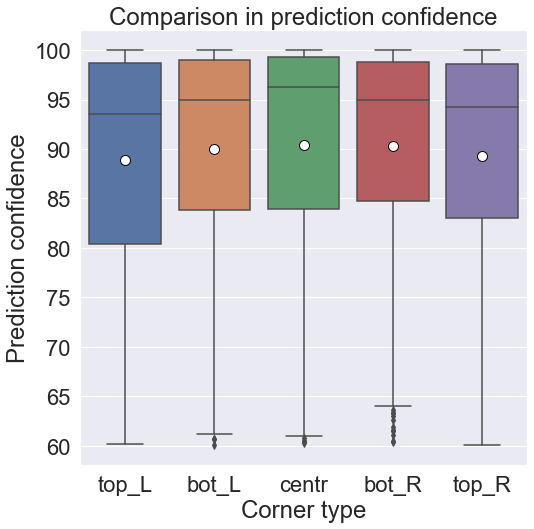

In [80]:
plt.rcParams['figure.figsize']=(8,8)
sns.boxplot(x='crop_type', y='pred', data=df, order=['top_L','bot_L','centr','bot_R','top_R'], showmeans=True, meanprops={"marker":"o","markerfacecolor":"white","markeredgecolor":"black","markersize":"10"})
sns.set(font_scale=2)
plt.title("Comparison in prediction confidence")
plt.ylabel("Prediction confidence")
plt.xlabel("Corner type")
plt.show()

In [76]:
df.dropna().groupby('crop_type')['pred','relative_size_pred','relative_size_true'].agg(['mean','median'])

pred            relative_size_pred            \
                mean     median               mean    median   
crop_type                                                      
bot_L      90.035110  94.913223           1.035109  0.796459   
bot_R      90.267853  94.950885           1.033089  0.805584   
centr      90.422948  96.241012           1.051154  0.795498   
top_L      88.879491  93.559504           1.056047  0.845287   
top_R      89.310441  94.228965           1.105588  0.894915   

          relative_size_true            
                        mean    median  
crop_type                               
bot_L               1.031608  0.785733  
bot_R               1.022527  0.781890  
centr               1.022796  0.778048  
top_L               1.069666  0.818071  
top_R               1.076333  0.809266

## Ground truth vs. prediction bounding box size

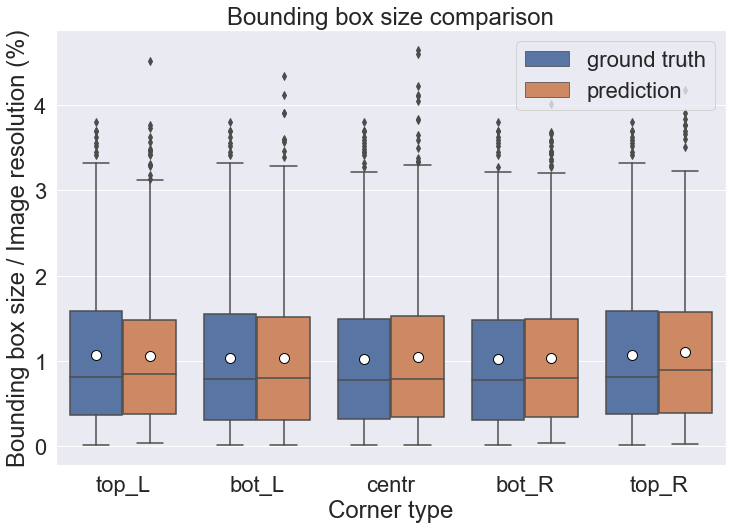

In [81]:
_df1 = df.dropna()

_df_groundtruth = pd.DataFrame()
_df_groundtruth['relative_size'] = _df1['relative_size_true']
_df_groundtruth['crop_type'] = _df1['crop_type']
_df_groundtruth['class'] = 'ground truth'

_df_prediction = pd.DataFrame()
_df_prediction['relative_size'] = _df1['relative_size_pred']
_df_prediction['crop_type'] = _df1['crop_type']
_df_prediction['class'] = 'prediction'

_df_analysis1 = pd.concat([_df_groundtruth, _df_prediction], axis=0, ignore_index=True)

plt.rcParams['figure.figsize']=(12,8)
sns.boxplot(x='crop_type', y='relative_size', data=_df_analysis1, order=['top_L','bot_L','centr','bot_R','top_R'], hue='class', showmeans=True, meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
plt.legend(loc='upper right')
plt.xlabel('Corner type')
plt.ylabel('Bounding box size / Image resolution (%)')
plt.title('Bounding box size comparison')
plt.show()

## Classified vs. Misclassified objects

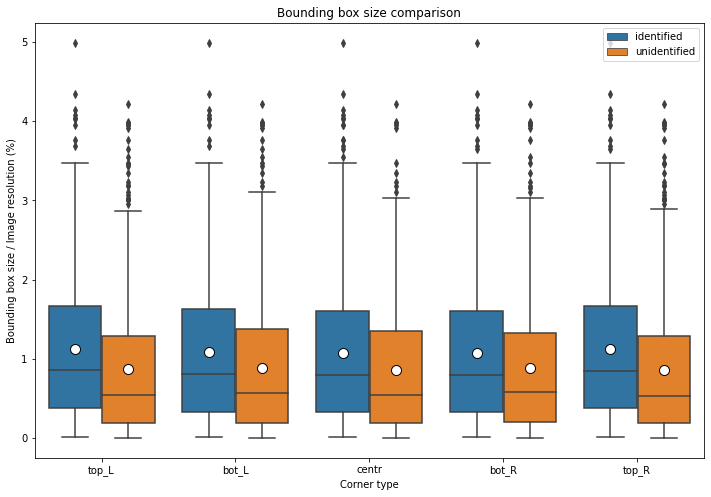

In [48]:
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_value = df[~row_has_NaN]

_df_NaN = pd.DataFrame()
_df_NaN['relative_size'] = rows_with_NaN['relative_size_true']
_df_NaN['type'] = rows_with_NaN['crop_type']
_df_NaN['class'] = 'unidentified'

_df_value = pd.DataFrame()
_df_value['relative_size'] = rows_with_value['relative_size_true']
_df_value['type'] = rows_with_value['crop_type']
_df_value['class'] = 'identified'

_df_analysis2 = pd.concat([_df_value, _df_NaN], axis=0, ignore_index=True)

plt.rcParams['figure.figsize']=(12,8)
sns.boxplot(x='type', y='relative_size', data=_df_analysis2, order=['top_L','bot_L','centr','bot_R','top_R'], hue='class', showmeans=True, meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
plt.legend(loc='upper right')
plt.xlabel('Corner type')
plt.ylabel('Bounding box size / Image resolution (%)')
plt.title('Bounding box size comparison')
plt.show()

# HTML visualisation

In [75]:
def generate_html(name, df, skip_rows):
    html_file_name = f'{name}.html'
    f = open(html_file_name, 'wt', encoding='utf8')

    f.write('<!DOCTYPE html>\n')
    f.write('<html lang="en">\n')

    f.write('<head>\n')
    f.write('<meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n')
    f.write('</head>')

    f.write('<style>')
    f.write('.img-overlay-wrap {position: relative; display: inline-block; transition: transform 150ms ease-in-out;}')
    f.write('.img-overlay-wrap svg {position: absolute; top: 0; left: 0;}')
    f.write('</style>')

    f.write("<body>")

    f.write("<table border=1>")
    f.write("<tr>")
    f.write("<th>#obj_id</th>")
    f.write("<th>coco image</th>")
    f.write("</tr>")

    n_rows = df.shape[0]
    for i in range(0, n_rows, skip_rows):
        obj_id = int(df['obj_id'].values[i])
        obj_ann = coco.loadAnns(obj_id)[0]
        img_ann = coco.loadImgs(obj_ann['image_id'])[0]
        coco_url = img_ann['coco_url']
        cell_height = 200
        cell_width = img_ann['width']*1.0/img_ann['height']*cell_height
        bbox_x, bbox_y, bbox_w, bbox_h = obj_ann['bbox']
        rect_x = bbox_x/img_ann['width']*cell_width
        rect_y = bbox_y/img_ann['height']*cell_height
        rect_w = bbox_w/img_ann['width']*cell_width
        rect_h = bbox_h/img_ann['height']*cell_height

        s = "<tr>\n"
        s += "<td>[%d]</td>\n" % obj_id
        
        s += "<td width=250>\n"
        s += "<div class='img-overlay-wrap'>\n"
        s += "<img id='%d_imgf' src='%s' alt='%s' height='%d'/>" % (obj_id, coco_url, coco_url, cell_height)
        s += "<svg style='width:100%;height:100%;'>\n"
        s += "<rect x='%f' y='%f' width='%f' height='%f' style='fill:none;stroke:rgb(255,255,255);stroke-width:2'/>\n" % (rect_x, rect_y, rect_w, rect_h)
        s += "<text x='%s' y='%s' text-anchor='top' fill='white' font-size='14' font-color='rgb(255,255,255)'>%s</text>\n" % (rect_x, rect_y-5, get_category_dictionary()[obj_ann['category_id']])
        s += "</svg>\n"
        s += "</div>\n"
        s += "</td>\n"
        s += "</tr>\n"
        f.write(s)

    f.write("</table>")

    f.write("</body>")

    f.write("</html>")
    f.close()

    print(f"html link: file:///Users/haiho/PycharmProjects/yolov3_huynhngocanh/paper_followup/{html_file_name}")

In [78]:
generate_html("identified_centre", df_centr.dropna(), 1)
generate_html("identified_top_L", df_top_L.dropna(), 1)
generate_html("identified_top_R", df_top_R.dropna(), 1)
generate_html("identified_bot_L", df_bot_L.dropna(), 1)
generate_html("identified_bot_R", df_bot_R.dropna(), 1)

html link: file:///Users/haiho/PycharmProjects/yolov3_huynhngocanh/paper_followup/identified_centre.html
html link: file:///Users/haiho/PycharmProjects/yolov3_huynhngocanh/paper_followup/identified_top_L.html
html link: file:///Users/haiho/PycharmProjects/yolov3_huynhngocanh/paper_followup/identified_top_R.html
html link: file:///Users/haiho/PycharmProjects/yolov3_huynhngocanh/paper_followup/identified_bot_L.html
html link: file:///Users/haiho/PycharmProjects/yolov3_huynhngocanh/paper_followup/identified_bot_R.html


In [83]:
generate_html("unidentified_centre", df_centr[df_centr['pred'].isnull()], 1)
generate_html("unidentified_top_L", df_top_L[df_top_L['pred'].isnull()], 1)
generate_html("unidentified_top_R", df_top_R[df_top_R['pred'].isnull()], 1)
generate_html("unidentified_bot_L", df_bot_L[df_bot_L['pred'].isnull()], 1)
generate_html("unidentified_bot_R", df_bot_R[df_bot_R['pred'].isnull()], 1)

html link: file:///Users/haiho/PycharmProjects/yolov3_huynhngocanh/paper_followup/unidentified_centre.html
html link: file:///Users/haiho/PycharmProjects/yolov3_huynhngocanh/paper_followup/unidentified_top_L.html
html link: file:///Users/haiho/PycharmProjects/yolov3_huynhngocanh/paper_followup/unidentified_top_R.html
html link: file:///Users/haiho/PycharmProjects/yolov3_huynhngocanh/paper_followup/unidentified_bot_L.html
html link: file:///Users/haiho/PycharmProjects/yolov3_huynhngocanh/paper_followup/unidentified_bot_R.html
